In [2]:
#Данные про Game of thrones

In [3]:
import pandas as pd
import math
%matplotlib inline

In [4]:
data = pd.read_csv("character-predictions.csv", index_col = "S.No")
data.shape

(1946, 32)

In [5]:
data.dtypes

actual                 int64
pred                   int64
alive                float64
plod                 float64
name                  object
title                 object
male                   int64
culture               object
dateOfBirth          float64
DateoFdeath          float64
mother                object
father                object
heir                  object
house                 object
spouse                object
book1                  int64
book2                  int64
book3                  int64
book4                  int64
book5                  int64
isAliveMother        float64
isAliveFather        float64
isAliveHeir          float64
isAliveSpouse        float64
isMarried              int64
isNoble                int64
age                  float64
numDeadRelations       int64
boolDeadRelations      int64
isPopular              int64
popularity           float64
isAlive                int64
dtype: object

In [6]:
data.info

<bound method DataFrame.info of       actual  pred  alive   plod                  name                 title  \
S.No                                                                           
1          0     0  0.054  0.946  Viserys II Targaryen                   NaN   
2          1     0  0.387  0.613           Walder Frey  Lord of the Crossing   
3          1     0  0.493  0.507          Addison Hill                   Ser   
4          0     0  0.076  0.924           Aemma Arryn                 Queen   
5          1     1  0.617  0.383        Sylva Santagar            Greenstone   
...      ...   ...    ...    ...                   ...                   ...   
1942       0     1  0.803  0.197                 Luwin                   NaN   
1943       0     1  0.987  0.013                  Reek                   NaN   
1944       1     1  0.520  0.480      Symeon Star-Eyes                   NaN   
1945       1     1  0.637  0.363             Coldhands                   NaN   
1946    

In [36]:
#Пункт 3, тип данных на более корректный
data.male = data.male.astype(bool)
data.culture = data.culture.astype(str)
for i in range(0,len(data.culture)):
    if data["culture"].iloc[i] == "nan":
        data["culture"].iloc[i] = ""
data.name = data.name.astype(str)
for i in range(0,len(data.name)):
    if data["name"].iloc[i] == "nan":
        data["name"].iloc[i] = ""
data.title = data.title.astype(str)
for i in range(0,len(data.name)):
    if data["title"].iloc[i] == "nan":
        data["title"].iloc[i] = ""
data.house = data.house.astype(str)
for i in range(0,len(data.house)):
    if data["house"].iloc[i] == "nan":
        data["house"].iloc[i] = ""
data.isMarried = data.isMarried.astype(bool)
data.isNoble = data.isNoble.astype(bool)
data.isAlive = data.isAlive.astype(bool)
data

,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,BooksAppearance,Age group
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.054,0.946,Viserys II Targaryen,,True,,NaN,NaN,...,False,False,NaN,11,1,1,0.605351,False,0,
2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,...,True,True,97.0,1,1,1,0.896321,True,5,Old
3,1,0,0.493,0.507,Addison Hill,Ser,True,,NaN,NaN,...,False,True,NaN,0,0,0,0.267559,True,1,
4,0,0,0.076,0.924,Aemma Arryn,Queen,False,,82.0,105.0,...,True,True,23.0,0,0,0,0.183946,False,0,Young
5,1,1,0.617,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,...,True,True,29.0,0,0,0,0.043478,True,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0.803,0.197,Luwin,,True,Westeros,NaN,299.0,...,False,False,NaN,0,0,1,0.351171,False,5,
1943,0,1,0.987,0.013,Reek,,True,,NaN,299.0,...,False,False,NaN,0,0,0,0.096990,False,3,
1944,1,1,0.520,0.480,Symeon Star-Eyes,,True,,NaN,NaN,...,False,False,NaN,0,0,0,0.030100,True,5,


In [8]:
#Пункт 4, добавляем столбец, в котором показано в скольких книгах появлялся герой
data["BooksAppearance"] = data.book1 + data.book2 + data.book3 + data.book4 + data.book5
data

,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,BooksAppearance
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.054,0.946,Viserys II Targaryen,,True,,NaN,NaN,...,NaN,False,False,NaN,11,1,1,0.605351,False,0
2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,...,1.0,True,True,97.0,1,1,1,0.896321,True,5
3,1,0,0.493,0.507,Addison Hill,Ser,True,,NaN,NaN,...,NaN,False,True,NaN,0,0,0,0.267559,True,1
4,0,0,0.076,0.924,Aemma Arryn,Queen,False,,82.0,105.0,...,0.0,True,True,23.0,0,0,0,0.183946,False,0
5,1,1,0.617,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,...,1.0,True,True,29.0,0,0,0,0.043478,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0.803,0.197,Luwin,,True,Westeros,NaN,299.0,...,NaN,False,False,NaN,0,0,1,0.351171,False,5
1943,0,1,0.987,0.013,Reek,,True,,NaN,299.0,...,NaN,False,False,NaN,0,0,0,0.096990,False,3
1944,1,1,0.520,0.480,Symeon Star-Eyes,,True,,NaN,NaN,...,NaN,False,False,NaN,0,0,0,0.030100,True,5


In [9]:
#Разобьем возраст на категориальные переменные, где child - [0, 17], yound - [18, 35], middle - [35, 55], old - [55, -] 
data["Age group"] = data.age.apply(lambda x: "Child" if x < 18 else "Young" if x < 36 else "Middle" if x < 56 else "Old" if (not math.isnan(x)) else "")
data

,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,BooksAppearance,Age group
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.054,0.946,Viserys II Targaryen,,True,,NaN,NaN,...,False,False,NaN,11,1,1,0.605351,False,0,
2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,...,True,True,97.0,1,1,1,0.896321,True,5,Old
3,1,0,0.493,0.507,Addison Hill,Ser,True,,NaN,NaN,...,False,True,NaN,0,0,0,0.267559,True,1,
4,0,0,0.076,0.924,Aemma Arryn,Queen,False,,82.0,105.0,...,True,True,23.0,0,0,0,0.183946,False,0,Young
5,1,1,0.617,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,...,True,True,29.0,0,0,0,0.043478,True,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0.803,0.197,Luwin,,True,Westeros,NaN,299.0,...,False,False,NaN,0,0,1,0.351171,False,5,
1943,0,1,0.987,0.013,Reek,,True,,NaN,299.0,...,False,False,NaN,0,0,0,0.096990,False,3,
1944,1,1,0.520,0.480,Symeon Star-Eyes,,True,,NaN,NaN,...,False,False,NaN,0,0,0,0.030100,True,5,


In [10]:
#Пункт 6
data[1:5].T

S.No,2,3,4,5
actual,1,1,0,1
pred,0,0,0,1
alive,0.387,0.493,0.076,0.617
plod,0.613,0.507,0.924,0.383
name,Walder Frey,Addison Hill,Aemma Arryn,Sylva Santagar
title,Lord of the Crossing,Ser,Queen,Greenstone
male,True,True,False,False
culture,Rivermen,,,Dornish
dateOfBirth,208,NaN,82,276
DateoFdeath,NaN,NaN,105,NaN


In [11]:
#Пункт 7
data.sort_values(["popularity", "age", "name"], ascending = [False, True, True]).head(20)

,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,BooksAppearance,Age group
S.No,,,,,,,,,,,,,,,,,,,,,
1475,1,0,0.289,0.711,Bran Stark,Prince of Winterfell,True,Northmen,290.0,NaN,...,False,True,15.0,7,1,1,1.0,True,5,Child
1467,1,0,0.315,0.685,Arya Stark,Princess,False,Northmen,289.0,NaN,...,False,True,16.0,8,1,1,1.0,True,5,Child
1793,1,1,0.961,0.039,Sansa Stark,Princess,False,Northmen,286.0,NaN,...,True,True,19.0,10,1,1,1.0,True,5,Young
1678,1,0,0.047,0.953,Daenerys Targaryen,Andals,False,Valyrian,284.0,NaN,...,True,True,21.0,15,1,1,1.0,True,5,Young
1750,1,1,0.884,0.116,Jon Snow,Lord Commander of the Night's Watch,True,Northmen,283.0,NaN,...,False,True,22.0,5,1,1,1.0,True,5,Young
55,1,0,0.352,0.648,Margaery Tyrell,Seven Kingdoms,False,Reach,283.0,NaN,...,True,True,22.0,3,1,1,1.0,True,5,Young
1785,0,0,0.450,0.550,Renly Baratheon,Lord Paramount of the Stormlands,True,Stormlands,277.0,299.0,...,True,True,22.0,2,1,1,1.0,False,5,Young
1786,1,0,0.259,0.741,Theon Greyjoy,green lands,True,Ironmen,278.0,NaN,...,False,True,27.0,4,1,1,1.0,True,5,Young
1841,1,0,0.293,0.707,Tyrion Lannister,Hand of the King,True,,273.0,NaN,...,True,True,32.0,12,1,1,1.0,True,5,Young


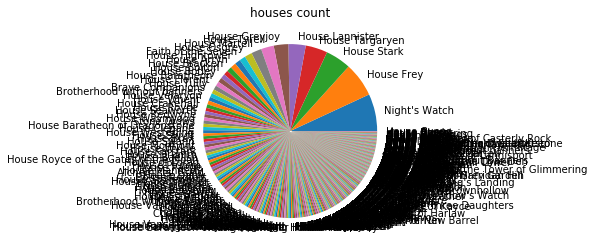

In [12]:
#Пункт 9 
#График численности домов. Показывает, какой дом является наибольшим.
data["house"].value_counts()[1:].plot(kind = "pie", title = "houses count")
#Самый многочисленный дом (не считая ночной дозор) - дом фреев(До определенного момента:))))))))


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age group')]

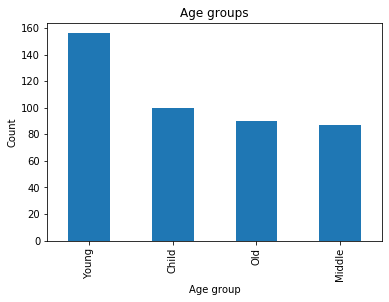

In [13]:
#График возрастных категорий. Он показывает, что наибольшее количество героев находится в young категории и наименьшее в middle
data["Age group"].value_counts()[1:].plot(kind = "bar", title = "Age groups").set(ylabel = "Count", xlabel = "Age group")

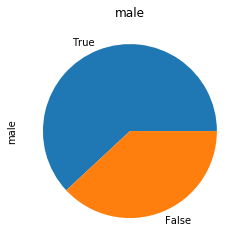

In [14]:
#График распределения героев по полам.
data["male"].value_counts().plot(kind = "pie", title = "male")

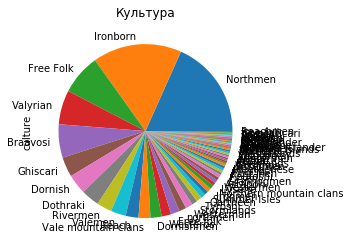

In [15]:
data["culture"].value_counts()[1:].plot(kind = "pie", title = "Культура")
#Подавляющее большинство людей имеют культуру Northermen и Ironborn

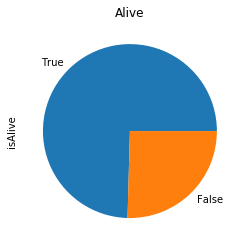

In [16]:
data["isAlive"].value_counts().plot(kind = "pie", title = "Alive")
#примерно 25 процентов героев погибло

In [17]:
#Пункт 10
data.pivot_table(index = ["male", "Age group"], columns = "isAlive", aggfunc = "size", fill_value = 0)
#Меньше всего погибло девушек в middle возрасте

isAlive          False  True 
male  Age group              
False               77    493
      Child         10     38
      Middle         5     16
      Old           20     10
      Young         16     56
True               255    688
      Child         23     29
      Middle        26     40
      Old           32     28
      Young         31     53

In [18]:
data.pivot_table(index = ["male", "Age group"], columns = "isPopular", aggfunc = "size", fill_value = 0)
#Единственная группа людей, которая не имеет популярности - женщины в old возрасте

isPopular          0   1
male  Age group         
False            567   3
      Child       46   2
      Middle      20   1
      Old         30   0
      Young       63   9
True             897  46
      Child       49   3
      Middle      48  18
      Old         47  13
      Young       64  20

In [19]:
data.pivot_table(index = ["BooksAppearance"], columns = "isPopular", aggfunc = "size", fill_value = 0)
#Герои, которые появлялись во всех пяти книгах - самые популярные


isPopular,0,1
BooksAppearance,,
0,243,29
1,659,4
2,326,5
3,279,7
4,171,11
5,153,59


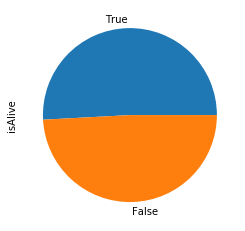

In [20]:
data[data["popularity"] > 0.6]["isAlive"].value_counts().plot(kind = "pie")
#Почти половина главных героев погибла

In [21]:
#Пункт 12
data.loc[:, ["pred", "isAlive"]].corr()
#Эта корреляция означает, что в основном предположения компьютера являются неверными

,pred,isAlive
pred,1.000000,0.356483
isAlive,0.356483,1.000000


In [22]:
data.loc[:, ["pred", "alive", "plod", "male", "dateOfBirth", "DateoFdeath", "book1", "book2", "book3", "book4", "book5", "popularity", "isAlive"]].corr()

,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,popularity,isAlive
pred,1.000000,0.894427,-0.894427,-0.193754,-0.072865,-0.084974,-0.220113,-0.107290,0.008003,0.307838,-0.089181,-0.344108,0.356483
alive,0.894427,1.000000,-1.000000,-0.199020,-0.040937,-0.104955,-0.241441,-0.143350,-0.026135,0.404151,-0.059397,-0.354584,0.417318
plod,-0.894427,-1.000000,1.000000,0.199020,0.040937,0.104955,0.241441,0.143350,0.026135,-0.404151,0.059397,0.354584,-0.417318
male,-0.193754,-0.199020,0.199020,1.000000,-0.084351,-0.000429,0.084876,0.060322,0.023364,-0.063178,0.062387,0.140828,-0.146982
dateOfBirth,-0.072865,-0.040937,0.040937,-0.084351,1.000000,-0.010284,0.101590,0.055825,-0.022845,-0.032140,-0.008324,-0.015658,-0.085863
DateoFdeath,-0.084974,-0.104955,0.104955,-0.000429,-0.010284,1.000000,0.135993,-0.042945,-0.052567,-0.078172,-0.028247,0.031211,NaN
book1,-0.220113,-0.241441,0.241441,0.084876,0.101590,0.135993,1.000000,0.392439,0.243843,0.079959,0.264818,0.324782,-0.147401
book2,-0.107290,-0.143350,0.143350,0.060322,0.055825,-0.042945,0.392439,1.000000,0.449931,0.175937,0.225677,0.247918,-0.067200
book3,0.008003,-0.026135,0.026135,0.023364,-0.022845,-0.052567,0.243843,0.449931,1.000000,0.373553,0.285103,0.214018,0.006693
book4,0.307838,0.404151,-0.404151,-0.063178,-0.032140,-0.078172,0.079959,0.175937,0.373553,1.000000,0.337415,0.116085,0.268975


In [23]:
#Плод - шанс смерти, alive - шанс выживания. Из таблицы следуют, что они абсолютно обратные переменные.
#Больше всего людей умирает в 1 книге, а выживает в 4 книге
#Больше сильных корреляций не наблюдается.

In [24]:
data.popularity.mean(skipna = True)
#В среднем персонажи не сильно популярны среди фанатов

0.08958432871476318

In [25]:
data.pred.mean(skipna = True)
#Алгоритм говорит, что в целом большинство персонажей выживет

0.6870503597122302

In [26]:
data.dateOfBirth.median(skipna = True)
#Средняя медиана года рождения - 268 год

268.0

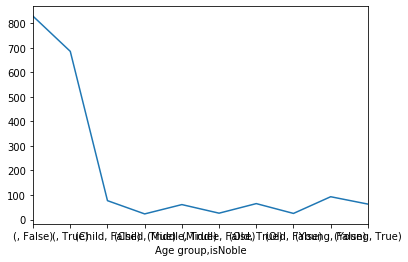

In [27]:
data.groupby("Age group")["isNoble"].value_counts().plot()
#Большинство персонажей не титулованы

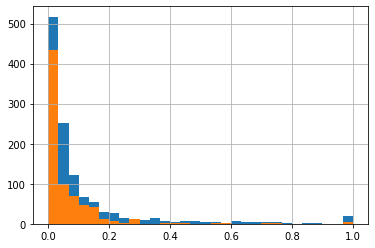

In [28]:
import seaborn as sns 
import statistics as st

data[data.male == True].popularity.hist(bins = 30)
data[data.male == False].popularity.hist(bins = 30)
#Большинство персонажей либо совсем не популярно, либо совсем популярно(Всплеск в начале и в конце, а в середине практически нет серьезных величин)

In [29]:
def otk(mean, sto):
    k = 0
    for i in data[sto]:
        k += (i - mean)**2
    return math.sqrt(k/len(data[sto]))
display(otk(data.popularity.mean(skipna = True), "popularity"))

0.16052716173657125

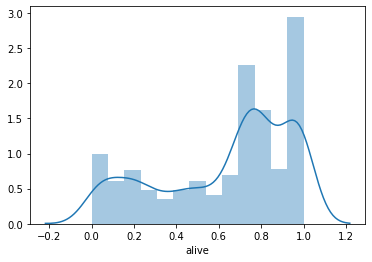

In [30]:
sns.distplot(data.alive.dropna())
#Компьтер всегда выдает информацию "Уверенно", это можно заметить по двум пикам в концах распределения

In [31]:
st.mode(data["actual"])
#Большинство людей выжило 

1

In [32]:
data.DateoFdeath.describe()

count       444.000000
mean       2950.193694
std       28192.245529
min           0.000000
25%         282.000000
50%         299.000000
75%         299.000000
max      298299.000000
Name: DateoFdeath, dtype: float64

In [33]:
#Пс немного значения в табличке сломаны

In [34]:
#Задание 2

In [35]:
rows = []
link = "https://www.hse.ru/news/page"
import requests
from bs4 import BeautifulSoup as bs
for i in range(1,20):
    page = bs(requests.get(link + str(i) + ".html").text, "lxml")
    for tag in page.find_all("div", {"class" : "post"}):
        url = tag.find_all("a", {"class" : "link"})[0]
        if url["href"].startswith("https"):
            continue
        url = "https://www.hse.ru" + url["href"]
        row = []
        description = tag.find_all("div", {"class": "post__text"})[0].text
        news_page = bs(requests.get(url).text, "lxml")
        for date in news_page.find_all("div", {"class": "post-meta__date"}):
            row.append("".join(date.text))
            break
        for title in news_page.find_all("h1", {"class": "post-title"}):
            row.append(title.text)
        row.append(description)
        rubric = "; ".join([x.text for x in tag.find_all("a", {"class": "rubric"})])
        row.append(rubric)
        tags = "; ".join([x.text for x in tag.find_all("a", {"class": "tag"})])
        row.append(tags)
        peoples = "; ".join([x.text for x in news_page.find_all("div", {"class": "b-peoples__person"})])
        row.append(peoples)
        mentioned = ""
        try:
            mentioned = news_page.find_all("div", {"class": "articleMetaItem__content"})[3].text
        except IndexError:
            pass
        row.append(mentioned)
        full_text = "\n".join([x.text for x in news_page.find_all("div", {"class": "builder--text"})])
        row.append(full_text)
        for image in tag.find_all("div", {"class": "picture"}):
            image_link = "https://www.hse.ru" + image.find_all("img")[0]["src"]
        row.append(image_link)
        row.append(url)
        rows.append(row)
df = pd.DataFrame(rows)
display(df)


,0,1,2,3,4,5,6,7,8,9
0,16мар2020,«Онлайн-семинары обеспечивают более высокую ко...,16 марта ректор ВШЭ Ярослав Кузьминов принял у...,Образование,новое в ВШЭ; разъяснение нововведения; онлайн-...,Кузьминов Ярослав Иванович,,16 марта ректор ВШЭ Ярослав Кузьминов принял у...,https://www.hse.ru/data/2020/03/16/1565240200/...,https://www.hse.ru/news/edu/350071130.html
1,16мар2020,Вышка в третий раз привлечет российских постдоков,Конкурсный отбор кандидатов для работы в иссле...,Наука,новое в ВШЭ; приглашение к участию,,,Конкурсный отбор кандидатов для работы в иссле...,https://www.hse.ru/data/2020/03/16/1565193697/...,https://www.hse.ru/news/science/350025523.html
2,16мар2020,Профессор ВШЭ записал видеоинструкцию по созда...,Профессор Школы бизнеса и делового администрир...,Образование,новое в ВШЭ; разъяснение нововведения; онлайн-...,Липсиц Игорь Владимирович,,Профессор Школы бизнеса и делового администрир...,https://www.hse.ru/data/2020/03/16/1565304265/...,https://www.hse.ru/news/edu/349873947.html
3,16мар2020,"«Мы планируем создать настоящее партнерство, к...",Высшая школа экономики и частное образовательн...,Образование,новое в ВШЭ; репортаж о событии; довузовская п...,Башев Вячеслав Владимирович; Каспржак Анатолий...,,Высшая школа экономики и частное образовательн...,https://www.hse.ru/data/2020/03/16/1565300054/...,https://www.hse.ru/news/edu/349869956.html
4,15мар2020,ВШЭ поможет вузам организовать онлайн-обучение,"Высшая школа экономики предлагает вузам, объяв...",Образование,идеи и опыт; разъяснение нововведения; обществ...,,,"Высшая школа экономики предлагает вузам, объяв...",https://www.hse.ru/data/2020/03/15/1564903751/...,https://www.hse.ru/news/edu/349211541.html
...,...,...,...,...,...,...,...,...,...,...
141,9дек2019,Студенты Вышки заняли третье место на междунар...,В этом году в масштабном мероприятии приняли у...,Образование,достижения; студенты; хакатон,,"Факультет бизнеса и менеджмента, Факультет ком...",В этом году в масштабном мероприятии приняли у...,https://www.hse.ru/data/2019/12/09/1523600095/...,https://www.hse.ru/news/edu/323373069.html
142,6дек2019,"«У меня сегодня счастливый день, потому что я ...",В Институте классического Востока и античности...,Университетская жизнь,новое в ВШЭ; репортаж о событии; востоковедени...,Простаков Иван Валериевич; Смирнов Илья Сергеевич,,В Институте классического Востока и античности...,https://www.hse.ru/data/2019/12/06/1521416299/...,https://www.hse.ru/news/life/322501305.html
143,6дек2019,Эксперты НИУ ВШЭ разработали предложения по за...,Двухдневной стратегической сессией в Тюмени за...,Экспертиза,исследования и аналитика; экспертиза; национал...,Абанкина Татьяна Всеволодовна; Бенуж Андрей Ал...,"Институт образования, Институт статистических ...",Двухдневной стратегической сессией в Тюмени за...,https://www.hse.ru/data/2019/12/06/1520937130/...,https://www.hse.ru/news/expertise/322022008.html
144,5дек2019,Что может театр рассказать о прошлом,"Каким мы помним советский театр, что могут рас...",Наука,идеи и опыт; дискуссии; советская культура; театр,,,,https://www.hse.ru/data/2019/12/05/1522132270/...,https://www.hse.ru/news/science/321906684.html
